# Figure 2, Metric examples

In [47]:
import os
import sys
import re
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import tools as tl
from coralModel import Reef, Organism, Ocean
import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

type_dictionary = {'coral':0, 'turf':1, 'macroalgae':2}

In [48]:
##### Functions

## For plots
class HandlerSquare(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = xdescent + 0.5 * (width - height), ydescent
        p = mpatches.Rectangle(xy=center, width=height,
                               height=height, angle=0.0)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p] 

## For pulling/processing image info in pandas df to plotable matrix
def prep_image(df, simulation, time):    
    image = df[(df['time']==time)&(df['simulation']==simulation)]['image']
    image = np.genfromtxt([image.values[0].replace('[', '').replace(']', '')])
    image = np.reshape(image, (25,25))
    return(image)
 
def density_from_image(image):
    
    Moorea = Reef()
    count=0
    for i in range(0, number_of_rows):
        for j in range(0, number_of_columns):
            
            node = Organism(type=image[i,j], 
                            location=[i,j], 
                            ID=count)
            Moorea.append(node)
            count = count + 1
    Moorea.generate_graph(1.45)
    densities = np.array([Moorea.nodes[n].neighbors[0] for n,val in enumerate(Moorea.nodes)])
    values = [Moorea.nodes[n].type for n,val in enumerate(Moorea.nodes)]
    return(values, densities)

In [49]:
path = './figures/paper/2_metric_examples/'
extension = '.png'

In [50]:
## View specific configuration

top_directory = "./output/" #os.getcwd()
files, runs = tl.view_runs(top_directory)
number_of_rows = 25
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['number_of_rows']==number_of_rows)&
              (runs['grazing']==57)&
              (runs['grid_option']==0)&
              (runs['initial_coral_percent']==33)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
1,25,25,0,57,145,33,33,10,40,20,75,1010,10,100,1


In [51]:
## Load data

df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)
dt=.1
df['time'] = df['timestep']*dt
df['C'] = round(df.coral_percent/100,2)
df['T'] = round(df.turf_percent/100,2)
df['M'] = round(df.macroalgae_percent/100,2)

In [52]:
simulation=2

_______

## Short Version

_______

## A.  Temporal Evolution

In [53]:
## Plot Parameters

sns.set_style("ticks")
colors =['#EE8382', '#508991', '#172A3A']
success_palette = sns.set_palette(sns.color_palette(colors))

figsize = (7,1.3)
times = [0,50,100]
top = .75

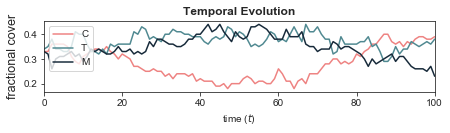

In [54]:
### create df with columns of interest

simulation=6

name = 'temporal_evolution_3_species'

time_final = 100
columns =['C', 'T', 'M']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)].set_index('time')[columns]
data.plot(figsize=figsize)
plt.title('Temporal Evolution', fontweight='bold')
plt.xlabel(r"time ($t$)")
plt.ylabel('fractional cover', fontsize=12.5)
plt.legend(loc='upper left')

plt.savefig(path + name + extension, dpi=600, bbox_inches = "tight", facecolor='#EDEDED')

## B. Spatial Evolution

In [55]:
## Data prep

columns =['coral_percent', 'turf_percent', 'macroalgae_percent','time','simulation', 'image', 'coral_coral_neighbors']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)][columns]

In [56]:
## Plot Parameters

sns.set_style("ticks")
colors =['#EE8382', '#508991', '#172A3A']

levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

figsize = (6,5)
times = [0,50,100]
top = 1.4

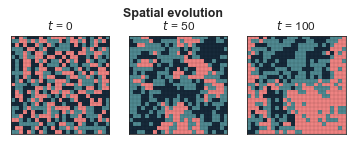

In [57]:
## Plot Images

name = 'spatial_evolution_images'
colors =['#EE8382', '#508991', '#172A3A']
success_palette = sns.set_palette(sns.color_palette(colors))

levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

fig, ax = plt.subplots(1, len(times), figsize=figsize) 

for index in range(0, len(times)):
    
    image = prep_image(data,simulation,times[index])
    
    ax[index].imshow(image, cmap=cmap, norm=norm)
    ax[index].set_title(r'$t$ = ' + str(int(times[index])))

    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)
    
#ax[0].set_ylabel('Spatial Evolution', fontweight='bold', fontsize=12.5)
    
fig.suptitle('Spatial evolution', fontweight='bold', fontsize=12.5)
fig.subplots_adjust(wspace=0.2, top=top)
#plt.suptitle()
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight")

## C. Coral Neighborhood

In [58]:
## Plot Parameters

sns.set_style("ticks")
colors =['#EE8382', '#508991', '#172A3A']

levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

figsize = (7,1.9) #vertical depth:1
times = [0,50,100]
top = .87 # vertical title:1.4

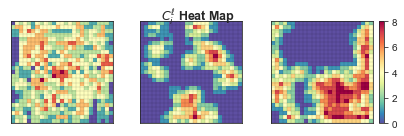

In [59]:
cmap = plt.cm.get_cmap('Spectral_r')

name = 'coral_neighbors_images'

number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(times), figsize=figsize, gridspec_kw={'width_ratios': [1,1,1.25]}) 

for index in range(0, len(times)):
    
    image = prep_image(data,simulation,times[index])    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    ax[index].imshow(image, cmap=cmap)
    #ax[index].set_title(r'$t$'+' = ' + str(int(times[index])))
    #ax[index].axes.xaxis.set_visible(False)
    #ax[index].axes.yaxis.set_visible(False)
    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)

fig_legend = plt.imshow(image, cmap=cmap)
plt.colorbar(fig_legend)

#ax[0].set_ylabel('$C_i^\ell$ Heat Map', fontweight='bold', fontsize=12.5)

fig.subplots_adjust(wspace=0.2, top=top)
plt.suptitle('$C_i^\ell$ Heat Map', fontweight='bold', fontsize=12.5)

plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight")

## D. Coral Coral Neighbors

In [60]:
## Plot Parameters

figsize = (7,2.3)
times = [0,50,100]
top = .75

/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


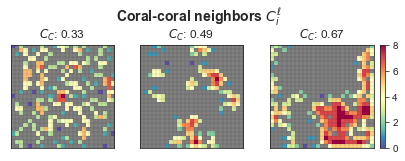

In [61]:
name = 'masked_images'

number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(times), figsize=figsize, gridspec_kw={'width_ratios': [1,1,1.25]}) 

for index in range(0, len(times)):
    
    time=times[index]
    
    image = prep_image(data,simulation,time)
    image_binary = np.nan_to_num(image/image)
    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    image_nan = image/(1-image_binary)
    masked_array = np.ma.array(image_nan, mask=np.isnan(image_nan))
    
    cmap.set_bad('gray',1.)

    ax[index].imshow(masked_array, cmap=cmap)
    ax[index].set_title(r'$C_C$: ' + 
                         str(round((data[(data['time']==time)&
                                  (data['simulation']==simulation)]['coral_coral_neighbors'].values[0]),2)))
    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)
    
    
#ax[0].set_ylabel('$C_i^\ell$, Subset for $\mathcal{C}$', fontweight='bold', fontsize=12.5)


fig_legend = plt.imshow(masked_array, cmap=cmap)
plt.colorbar(fig_legend)
    
plt.suptitle('Coral-coral neighbors $C_i^\ell$', fontweight='bold', fontsize=14)
fig.subplots_adjust(wspace=0.2, top=top)
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight")

___
### Longer Version
___

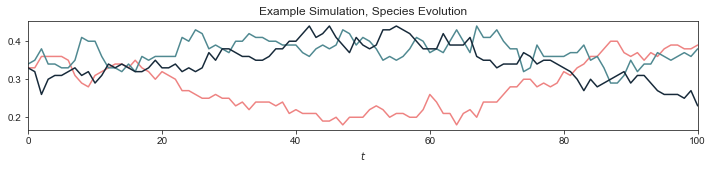

In [62]:
### create df with columns of interest
name = 'temporal_evolution_3_species'

time_final = 100
timesteps=[]
columns =['C', 'T', 'M']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)].set_index('time')[columns]
data.plot(figsize=(12,2), legend=False)
plt.title('Example Simulation, Species Evolution')
plt.xlabel(r"$t$")
plt.savefig(path + name + extension, dpi=400)

In [63]:
columns =['coral_percent', 'turf_percent', 'macroalgae_percent','time','simulation', 'image', 'coral_coral_neighbors']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)][columns]

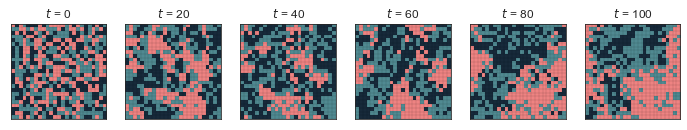

In [64]:
name = 'spatial_evolution_images_long'
colors =['#EE8382', '#508991', '#172A3A']
success_palette = sns.set_palette(sns.color_palette(colors))

levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')
timesteps = [0,20,40,60,80,100]

fig, ax = plt.subplots(1, len(timesteps), figsize=(12,3)) 

for index in range(0, len(timesteps)):
    
    image = prep_image(data,simulation,timesteps[index])
    
    ax[index].imshow(image, cmap=cmap, norm=norm)
    ax[index].set_title(r'$t$ = ' + str(int(timesteps[index])))

    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)
    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=.75)
plt.savefig(path + name + extension, dpi=400)

In [65]:
## Plot Parameters

sns.set_style("ticks")
colors =['#EE8382', '#508991', '#172A3A']

levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

figsize = (7,1.9) #vertical depth:1
times = [0,50,100]
top = .87 # vertical title:1.4

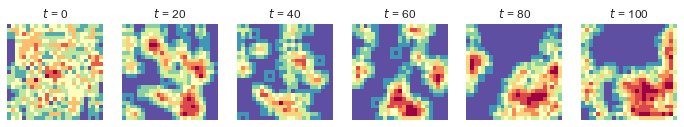

In [66]:
cmap = plt.cm.get_cmap('Spectral_r')

name = 'coral_neighbors_images_long'

timesteps = [0, 20,40,60,80,100]
number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(timesteps), figsize=(12,3)) 

for index in range(0, len(timesteps)):
    
    image = prep_image(data,simulation,timesteps[index])    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    ax[index].imshow(image, cmap=cmap)
    ax[index].set_title(r'$t$'+' = ' + str(int(timesteps[index])))
    ax[index].axes.xaxis.set_visible(False)
    ax[index].axes.yaxis.set_visible(False)
    ax[index].set_frame_on(False)
    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=.75)
plt.savefig(path + name + extension, dpi=400)

/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


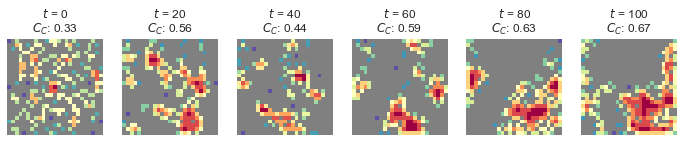

In [67]:
name = 'masked_images_long'

times = [0, 20,40,60,80,100]
number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(timesteps), figsize=(12,4)) 

for index in range(0, len(times)):
    
    time=times[index]
    
    image = prep_image(data,simulation,time)
    image_binary = np.nan_to_num(image/image)
    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    image_nan = image/(1-image_binary)
    masked_array = np.ma.array(image_nan, mask=np.isnan(image_nan))
    
    cmap.set_bad('gray',1.)

    ax[index].imshow(masked_array, cmap=cmap)
    ax[index].set_title(r'$t$ = ' + str(int(time)) + '\n'+  r'$C_C$: ' + 
                         str(round((data[(data['time']==time)&
                                  (data['simulation']==simulation)]['coral_coral_neighbors'].values[0]),2)))
    ax[index].axes.xaxis.set_visible(False)
    ax[index].axes.yaxis.set_visible(False)
    ax[index].set_frame_on(False)
    ax[index].set_xlabel('neighbors: \n' + 'coral_coral: ' + 
                         str(data[(data['time']==time)&
                                  (data['simulation']==simulation)]['coral_coral_neighbors']))
    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=.75)
plt.savefig(path + name + extension, dpi=400)